## Importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Apply seaborn styles to the plots
sns.set()

## Reading the CSV file

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/rennykurniasari/user_engangement_prediction/main/datasets/minutes_and_certificates.csv')

# Create a copy of the raw data to avoid modifying the original DataFrame
data = raw_data.copy()

# Display the first few rows of the dataset
data.head()

,student_id,minutes_watched,certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,9754,702.77,1
3,801,6066.00,13
4,2022,115.37,1


## Splitting the data into inputs and target

In [3]:
# Define the target variable (dependent variable) and inputs (independent variable)
target = data['certificates_issued']
inputs = data['minutes_watched']

## Splitting the data into training and test sets

In [4]:
# Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(inputs, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=365)

# Convert the data series into numpy arrays for compatibility with scikit-learn
x_train = x_train.to_numpy() 
x_test = x_test.to_numpy() 
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

# Reshape the training data to fit the model (necessary for a single feature input)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

## Creating the model and fitting it to the data

In [5]:
# Initialize the Linear Regression model
reg = LinearRegression()

# Train the model on the training data
reg.fit(x_train,y_train)

LinearRegression()

In [6]:
# Print the intercept and coefficient of the regression
reg.intercept_, reg.coef_

(1.0564011871197372, array([0.00174037]))

## Calculating the R-squared value 

In [7]:
# Print the R-squared value of the regression
reg.score(x_train, y_train)

0.3052942915158896

## Making predictions

In [8]:
# Make predictions on the test data
y_hat_test = reg.predict(x_test)

In [9]:
# Predict the number of certificates issued for 1200 minutes watched
reg.predict([[1200]])

array([3.14485052])

## Plotting the results

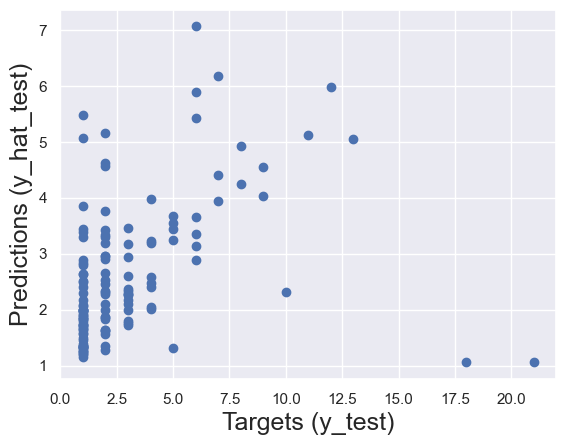

In [10]:
# Plot the actual test values against the predicted values
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()